<h1>Análisis sobre la incidencia del cigarrillo en la salud</h1>

Fuente: Martín, profesor-CODER HOUSE

 <h2>Objetivo general</h2>

Estimar el impacto del hábito de fumar en la salud y en las variables médicas registradas en la tabla, identificando posibles correlaciones, patrones y diferencias significativas entre fumadores y no fumadores.

 <h2>Objetivos específicos</h2>

1. Evaluar la relación entre el hábito de fumar y variables como peso, altura, circunferencia de cintura, hemoglobina, proteína en la orina, creatinina sérica, entre otras.

2. Determinar si existen diferencias significativas en la agudeza visual y auditiva entre fumadores y no fumadores.

3. Investigar posibles asociaciones entre el hábito de fumar y enfermedades bucodentales como caries dentales y sarro.

4. Analizar los niveles de enzimas hepáticas (AST, ALT, Gtp) en relación con el tabaquismo.

<h2>Abstract</h2>

En este estudio de ciencia de datos, se busca estimar el impacto del hábito de fumar en la salud y en diversas variables médicas registradas, mediante un análisis de exploración de datos (EDA) utilizando visualizaciones con las librerías Matplotlib y Seaborn. Se emplearán gráficos como boxplot, dispersión, histograma y correlación para identificar posibles relaciones, patrones y diferencias entre fumadores y no fumadores en función de las variables disponibles en la tabla.

A través de la visualización de datos con gráficos boxplot, se pretende comparar las distribuciones de las variables médicas entre fumadores y no fumadores, destacando posibles diferencias en medidas como peso, altura, circunferencia de cintura, hemoglobina, entre otras. Los gráficos de dispersión permitirán explorar la relación entre variables continuas y evaluar posibles asociaciones con el hábito de fumar. Además, se utilizarán histogramas para analizar la distribución de los datos y comprender mejor la variabilidad en las medidas registradas. Por último, se empleará el análisis de correlación para cuantificar las relaciones lineales entre las variables y determinar posibles dependencias entre el tabaquismo y otras medidas médicas.

Este enfoque basado en el EDA y visualizaciones detalladas con Matplotlib y Seaborn permitirá obtener una comprensión más profunda del impacto del tabaquismo en la salud a partir de los datos disponibles, identificando patrones significativos que puedan ser relevantes para futuras investigaciones y decisiones en el ámbito de la salud pública.

<h2>Hipótesis</h2>

La hipótesis planteada es que los fumadores presentarán niveles más altos de enzimas hepáticas (AST, ALT, Gtp) en comparación con los no fumadores, lo que sugiere un posible impacto negativo del hábito de fumar en la función hepática. Esta hipótesis se basa en estudios previos que han demostrado una asociación entre el tabaquismo y el daño hepático, debido a la exposición a sustancias tóxicas presentes en el humo del cigarrillo.

Esta hipótesis podría ser negada si al analizar los datos no se encuentran diferencias significativas en los niveles de enzimas hepáticas entre fumadores y no fumadores, lo que indicaría que otros factores podrían estar influyendo en la función hepática más allá del hábito de fumar. La negación de esta hipótesis abriría la puerta a explorar otros posibles factores que puedan estar relacionados con la salud hepática y que no estén directamente vinculados al tabaquismo.

<h2>Contexto comercial</h2>

Las empresas que desarrollan tecnología médica podrían utilizar estos hallazgos para crear dispositivos o soluciones innovadoras destinadas a ayudar a los fumadores a dejar el hábito o a monitorear su salud de manera más efectiva.

## EDA


A continuación procederemos a importar las librerías a utilizar durante el proceso de análisis de la data registrada que nos ayudarán a realizar el trabajo estadistico y la representación gráfica de los resultados, además, también llamaremos a nuestra base de datos en formato .CSV almacenada de forma local en el ordenador. Por ultimo, tambien nos permitirá ejecutar el modelo de regresión seleccionado para la estimación de los datos buscados.

Numpy

Pandas

Matplotlib

seaborn

Sklearn:

1.1. LabelEncoder

1.2. train_test_split

1.3. StandardScaler

1.4. KNeighborsRegressor

1.5. mean_squared_error, mean_absolute_error, r2_score

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA

In [40]:
pd.set_option('display.max_columns', 30)
df=pd.read_csv('smoking_prediction.csv')
OneHot=OneHotEncoder()

In [41]:
df_copy=df.copy()

Se realiza una copia del data frame, de aquí en más "df", con el nombre de "df_copy", para tener un respaldo ante cualquier modificación inesperada de la base de datos original.

In [42]:
df_copy.shape

(55692, 27)

In [43]:
df_copy.dtypes

ID                       int64
gender                  object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                    object
dental caries            int64
tartar                  object
smoking                  int64
dtype: object

In [44]:
df_copy.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [45]:
df_copy.sample(5)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
12346,15385,M,45,165,65,80.4,0.9,0.9,1.0,1.0,114.0,75.0,97.0,225.0,113.0,62.0,140.0,16.1,1.0,1.0,26.0,16.0,14.0,Y,1,N,1
29650,37006,M,40,165,75,87.7,1.5,1.5,1.0,1.0,110.0,70.0,115.0,136.0,142.0,56.0,52.0,15.4,1.0,0.9,26.0,21.0,52.0,Y,1,Y,1
43030,53793,M,25,175,80,94.0,0.5,0.3,1.0,1.0,119.0,77.0,96.0,238.0,225.0,45.0,148.0,16.8,1.0,0.8,82.0,129.0,127.0,Y,1,Y,1
4581,5768,F,60,150,60,87.0,0.7,0.7,1.0,1.0,122.0,76.0,116.0,174.0,53.0,76.0,87.0,14.4,1.0,0.8,24.0,31.0,29.0,Y,0,Y,0
33460,41797,F,55,150,50,74.0,0.8,1.0,1.0,1.0,151.0,93.0,128.0,195.0,63.0,60.0,122.0,13.7,1.0,0.7,33.0,24.0,33.0,Y,0,Y,0


In [46]:
df_copy = df_copy.drop(columns=['gender'])
df_copy = df_copy.drop(columns=['tartar'])
df_copy = df_copy.drop(columns=['oral'])
df_copy = df_copy.drop(columns=['ID'])
df_copy = df_copy.drop(columns=['height(cm)'])
df_copy = df_copy.drop(columns=['waist(cm)'])
df_copy = df_copy.drop(columns=['eyesight(left)'])
df_copy = df_copy.drop(columns=['eyesight(right)'])
df_copy = df_copy.drop(columns=['relaxation'])
df_copy = df_copy.drop(columns=['hearing(left)'])
df_copy = df_copy.drop(columns=['hearing(right)'])
df_copy = df_copy.drop(columns=['dental caries'])



In [48]:
df_copy.sample(5)

,age,weight(kg),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,smoking
42667,40,75,130.0,83.0,239.0,48.0,46.0,183.0,16.7,1.0,1.5,18.0,15.0,17.0,0
45921,45,55,146.0,99.0,215.0,130.0,45.0,144.0,14.9,1.0,0.7,25.0,16.0,36.0,0
40105,30,65,120.0,96.0,228.0,146.0,61.0,138.0,16.7,1.0,1.2,23.0,34.0,75.0,1
32197,35,75,130.0,105.0,127.0,59.0,49.0,66.0,15.8,1.0,1.1,30.0,48.0,54.0,1
23307,40,70,110.0,114.0,205.0,117.0,52.0,130.0,15.0,2.0,0.8,20.0,31.0,29.0,0


Se utilizó el método .drop para eliminar los datos que para efectos del análisis no son requeridos y pueden hacer ruido cuando se desee correr el método a seleccionado, como lo fue en este caso la columna gender, ID, height(cm),waist(cm),eyesight(left) y demás, las cuales no aportaban para este análsis un valor significativo que nos ayudase a tener valores apropiados en nuestro modelo.

In [49]:
df_copy.describe()

,age,weight(kg),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,65.864936,121.494218,99.312325,196.901422,126.665697,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.367288
std,12.071418,12.820306,13.675989,20.795591,36.297940,71.639817,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.482070
min,20.000000,30.000000,71.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000
25%,40.000000,55.000000,112.000000,89.000000,172.000000,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000
50%,40.000000,65.000000,120.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000
75%,55.000000,75.000000,130.000000,104.000000,220.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,1.000000
max,85.000000,135.000000,240.000000,505.000000,445.000000,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000


Utilizamos la función .describe() para conocer la información de la estadistica descriptiva del data frame, en este caso nos indica el número de datos no nulos en la columna, el promedio de los datos en dicha columna, la desviación estandar, el valor minimo y maximo de cada variable y los cuartiles que más adelante identificaremos en nuestros gráficos.

In [52]:
mpl.style.use('bmh')

#La línea de código mpl.style.use('bmh') se utiliza en el contexto 
# de visualización de datos con la librería Matplotlib en Python. 
# Esta línea de código establece el estilo de la visualización
# de los gráficos generados con Matplotlib al estilo 'bmh' (Bayesian Methods for Hackers), que
# es uno de los estilos predefinidos disponibles en Matplotlib.

variables= [ 'smoking', 'AST','ALT','Gtp']

#En la linea de codigo anterior llamamos a las variables de nuestro dataframe 'smoking', 'AST','ALT','Gtp'
#con las que buscaremos identificar una relación a partir de los siguientes gráficos.

c:\Users\manue\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

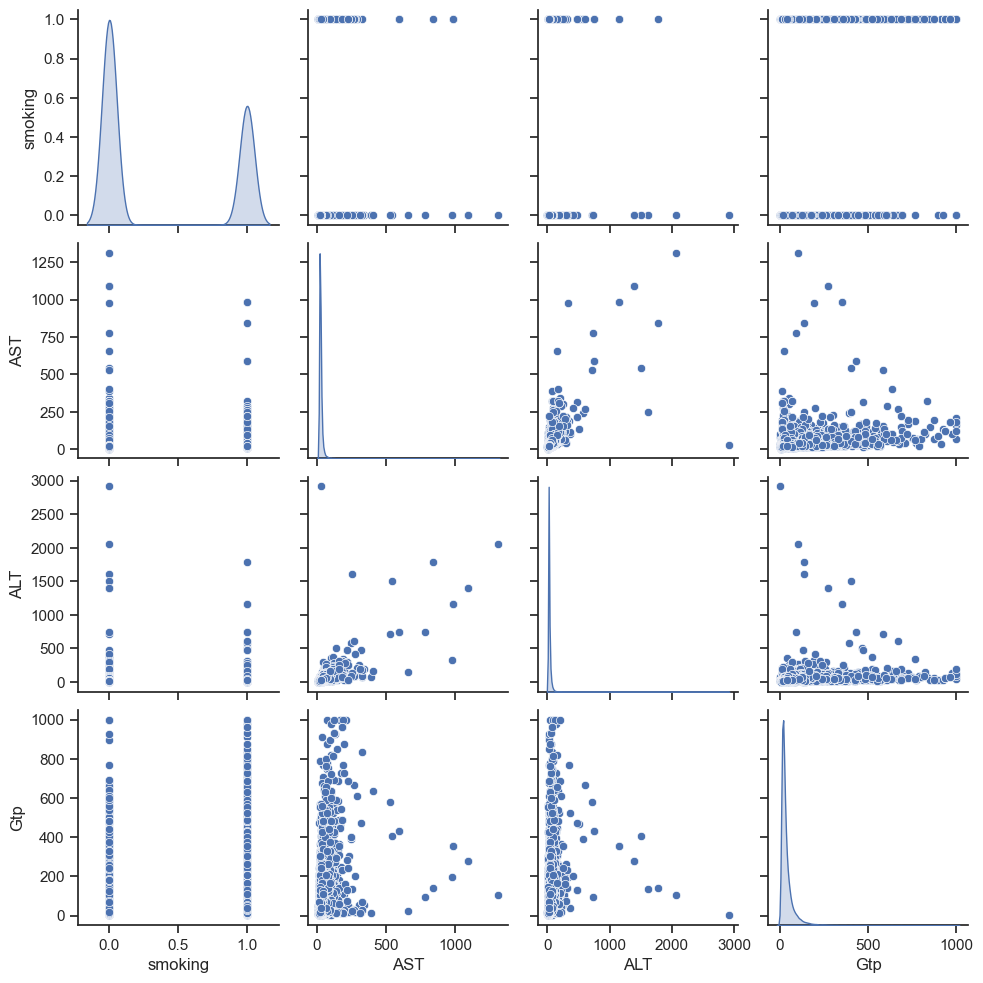

In [53]:
sns.set(style="ticks")
sns.pairplot(df[variables], diag_kind='kde')
plt.show

En los anteriores graficos utilizamos la librería Seaborn y su función Pairplot la cual nos permitió crear graficos de dispersión con las diferentes combinaciones entres las variables que estamos tratando.En este caso, no es posible afirmar que existe alguna relación entre la variable Smoking con el resto de variables con la que se pueda concluir alguna información clara.

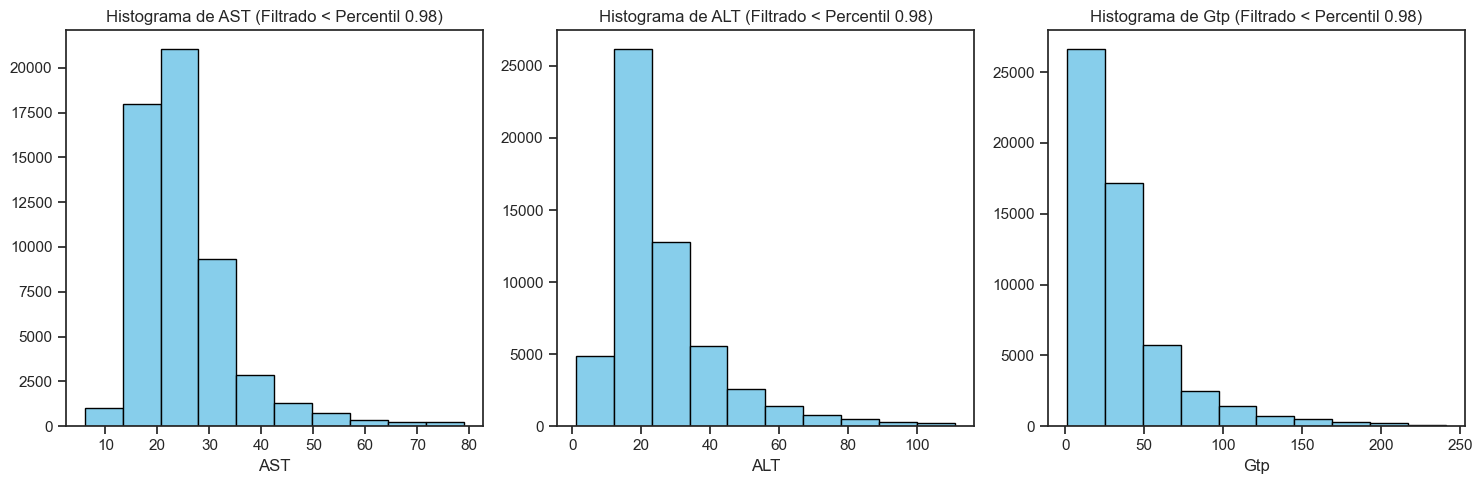

In [54]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for i, var in enumerate(['AST','ALT','Gtp']):

  percentil_98 = df[var].quantile(0.99)
   
 
  df_filtrado = df[df[var] < percentil_98]
   
  axs[i].hist(df_filtrado[var].dropna(), bins=10, color='skyblue', edgecolor='black')
  axs[i].set_title(f'Histograma de {var} (Filtrado < Percentil 0.98)')
  axs[i].set_xlabel(var)
   
plt.tight_layout()
plt.show()

En este caso podemos mostrar a través de un histograma la frecuencia absoluta asociada al número de registros relacionados con las variables en estudio, en este caso, podemos identificar que existe una diferencia de aproximadamente 15 mil registros entre las personas no fumadoras y fumadoras, sindo esta ultima la correspondiente al número más bajo de registros. Las graficas asociadas a las variables médicas epaticas AST, ALT, Gtp indican que la población en estudio se encuentra dentro del mismo rango con relación a sus analisis médicos asociados a estos parametros.

In [55]:
correlation_matr =df[['AST','ALT','smoking', 'Gtp']].corr()

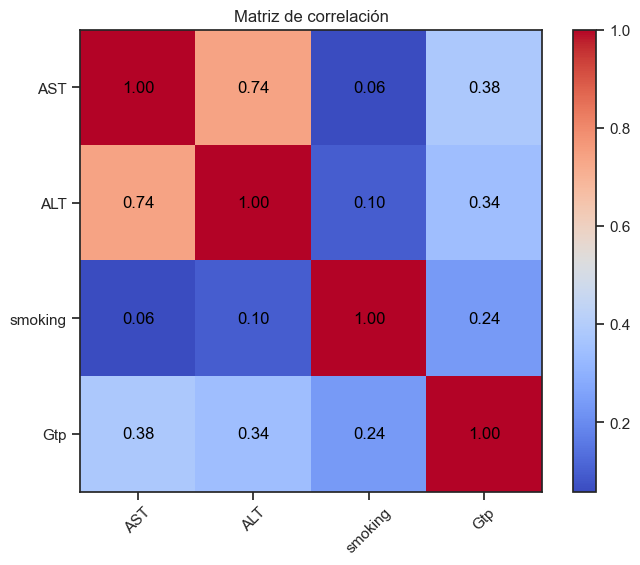

In [56]:
plt.figure(figsize=(8,6))
plt.imshow(correlation_matr, cmap='coolwarm', interpolation='nearest')


for i in range(len(correlation_matr)):
    for j in range(len(correlation_matr)):
        plt.text(j, i, '{:.2f}'.format(correlation_matr.iloc[i, j]), ha='center', va='center', color='black')

plt.colorbar()
plt.xticks(range(len(correlation_matr)), correlation_matr.columns, rotation=45)
plt.yticks(range(len(correlation_matr)), correlation_matr.columns)
plt.title('Matriz de correlación')
plt.show()

En nuestra grafica de correlación es posible apreciar que en su mayoria no existe relación lineal entre  los parametros, a excepción del ALT y el AST los cuales tienen un indice de correlación superior a 0.7, esto se debe a que ambas son enzimas que trabajan juntas desarrollando funciones hepáticas, y cuando existe un daño en el higado ambas son liberadas en gran proporción como medida contingente.

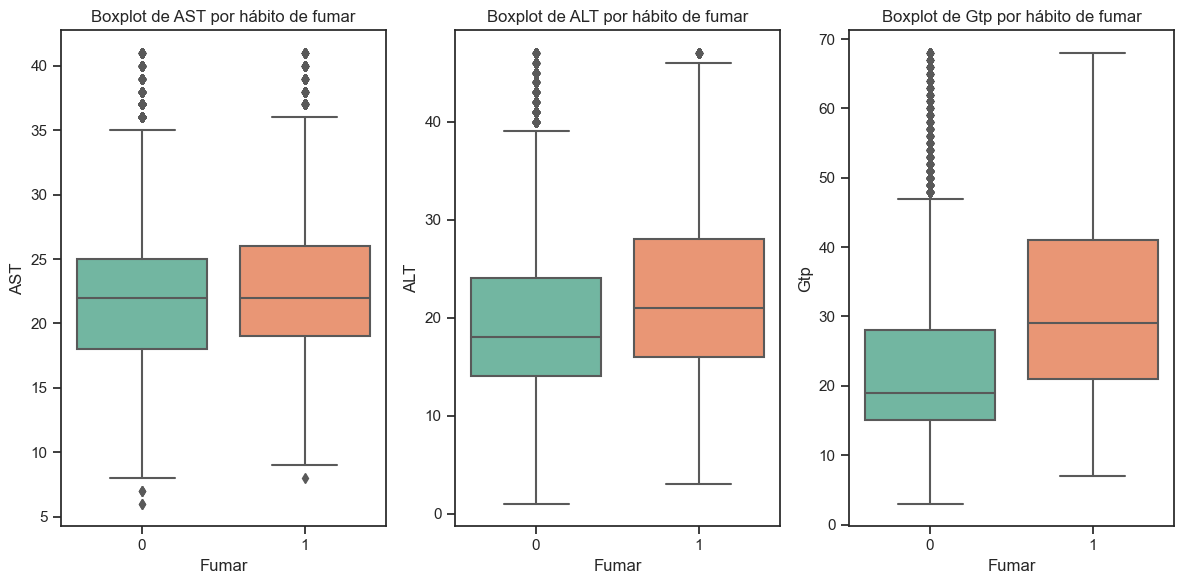

In [57]:

def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]


df_no_outliers = remove_outliers(df, 'AST')
df_no_outliers = remove_outliers(df_no_outliers, 'ALT')
df_no_outliers = remove_outliers(df_no_outliers, 'Gtp')


plt.figure(figsize=(12, 6))


plt.subplot(1, 3, 1)
sns.boxplot(x='smoking', y='AST', data=df_no_outliers, palette='Set2')
plt.title('Boxplot de AST por hábito de fumar')
plt.xlabel('Fumar')
plt.ylabel('AST')


plt.subplot(1, 3, 2)
sns.boxplot(x='smoking', y='ALT', data=df_no_outliers, palette='Set2')
plt.title('Boxplot de ALT por hábito de fumar')
plt.xlabel('Fumar')
plt.ylabel('ALT')


plt.subplot(1, 3, 3)
sns.boxplot(x='smoking', y='Gtp', data=df_no_outliers, palette='Set2')
plt.title('Boxplot de Gtp por hábito de fumar')
plt.xlabel('Fumar')
plt.ylabel('Gtp')

plt.tight_layout()
plt.show()


Para desarrollar nuestros graficos Boxplot creamos la función remove_outliers para mejorar la visibilidad e interprepación del mismo eliminando los outliers generados durante la primera ejecución del código. Posterior a ello utilizamos la librería de seaborn con la que llamamos a cada una de las variables donde se había almacenado la función junto con el parametro medico correspondiete. Aun podemos validar muchos outlier para las graficas relacionadas con los no fumadores dado a que el número de registros en esta categoría era mucho mayor que el de los fumadores. Se puede notar que la linea de Q2 se encuentra en su mayoría cerca de Q1, lo que nos indica una concentración relativa alta de los valores del extremo inferior y esto se puede deber a la presencia de los valores atipicos en la parte superior o que en este caso los valores de Gtp, ALT y AST son mas bajos que la media.

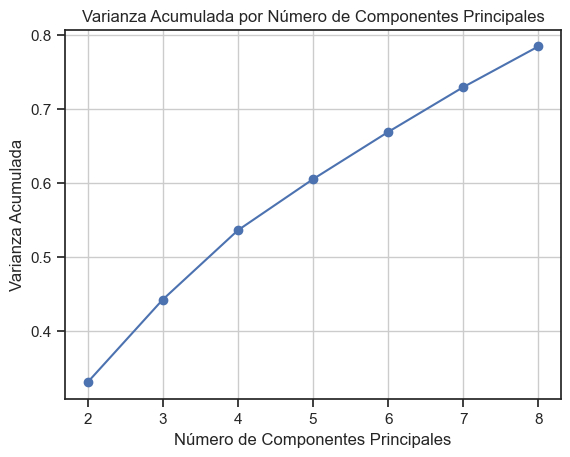

Número de componentes: 2, Varianza acumulada: 0.3301
Número de componentes: 3, Varianza acumulada: 0.4419
Número de componentes: 4, Varianza acumulada: 0.5357
Número de componentes: 5, Varianza acumulada: 0.6048
Número de componentes: 6, Varianza acumulada: 0.6686
Número de componentes: 7, Varianza acumulada: 0.7293
Número de componentes: 8, Varianza acumulada: 0.7844
Evaluando para AST:
  - Para k=1:
    RMSE: 6.0755
    MAE: 3.1373
    R^2: 0.8776
-------------------------
  - Para k=5:
    RMSE: 6.7321
    MAE: 3.4460
    R^2: 0.8497
-------------------------
  - Para k=10:
    RMSE: 6.5212
    MAE: 3.4209
    R^2: 0.8590
-------------------------
  - Para k=20:
    RMSE: 7.4970
    MAE: 3.4810
    R^2: 0.8136
-------------------------


Evaluando para ALT:
  - Para k=1:
    RMSE: 9.7759
    MAE: 4.5996
    R^2: 0.8170
-------------------------
  - Para k=5:
    RMSE: 10.9207
    MAE: 5.0725
    R^2: 0.7716
-------------------------
  - Para k=10:
    RMSE: 9.7185
    MAE: 5.0083
  

In [70]:
X = df_copy[['age', 'weight(kg)', 'systolic', 'fasting blood sugar', 'Cholesterol', 
             'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 
             'serum creatinine', 'AST', 'ALT', 'Gtp', 'smoking']]
y = df_copy[['AST', 'ALT', 'Gtp']]

# Escalar las características utilizando StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular PCA para componentes de 2 a 6
componentes = [2, 3, 4, 5, 6, 7, 8]
varianza_acumulada = []

for n_componentes in componentes:
    pca = PCA(n_components=n_componentes)
    pca.fit(X_scaled)
    varianza_acumulada.append(sum(pca.explained_variance_ratio_))

# Graficar la varianza acumulada
plt.plot(componentes, varianza_acumulada, marker='o')
plt.title('Varianza Acumulada por Número de Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.xticks(componentes)
plt.grid(True)
plt.show()

# Imprimir la varianza acumulada
for n_componentes, varianza in zip(componentes, varianza_acumulada):
    print(f'Número de componentes: {n_componentes}, Varianza acumulada: {varianza:.4f}')

# Seleccionar el número óptimo de componentes (ajustar esto basado en la varianza acumulada)
n_componentes_optimos = 8  # Puedes ajustar esto según los resultados de la varianza acumulada
pca = PCA(n_components=n_componentes_optimos)
X_pca = pca.fit_transform(X_scaled)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Valores de k a probar
valores_k = [1, 5, 10, 20]

# Probar diferentes valores de k para cada variable objetivo
for target in ['AST', 'ALT', 'Gtp']:
    print(f"Evaluando para {target}:")
    for k in valores_k:
        # Instanciar el regresor k-NN con el valor de k actual
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train[target])
        
        # Hacer predicciones
        predictions = knn.predict(X_test)
        
        # Calcular métricas de rendimiento
        mse = mean_squared_error(y_test[target], predictions)
        rmse = np.sqrt(mse)  # Calcular RMSE a partir de MSE
        mae = mean_absolute_error(y_test[target], predictions)
        r2 = r2_score(y_test[target], predictions)
        
        # Imprimir los resultados
        print(f"  - Para k={k}:")
        print(f"    RMSE: {rmse:.4f}")
        print(f"    MAE: {mae:.4f}")
        print(f"    R^2: {r2:.4f}")
        print("-------------------------")
    print("\n")

# Obtener las composiciones de las componentes principales
composiciones = pd.DataFrame(pca.components_, columns=['age', 'weight(kg)', 'systolic', 'fasting blood sugar', 'Cholesterol', 
                                                       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 
                                                       'serum creatinine', 'AST', 'ALT', 'Gtp', 'smoking'], 
                             index=[f'Componente {i+1}' for i in range(n_componentes_optimos)])
print("Composiciones de las componentes principales:")
print(composiciones)

## Conclusión

El análisis de PCA reveló que utilizar 8 componentes es apropiado, explicando el 78.44% de la varianza total. Este número de componentes ofrece un balance adecuado entre simplificación y retención de información relevante. Al evaluar los modelos de regresión k-NN para cada parámetro, se determinó que los valores óptimos de \( k \) son 1 para AST, 10 para ALT y 5 para Gtp. Estos valores proporcionan los mejores resultados en términos de RMSE, MAE y \( R^2 \). Específicamente, \( k = 1 \) para AST mostró un RMSE de 6.0755 y \( R^2 \) de 0.8776, \( k = 10 \) para ALT tuvo un RMSE de 9.7185 y \( R^2 \) de 0.8191, y \( k = 5 \) para Gtp presentó un RMSE de 20.4034 y \( R^2 \) de 0.8238. Estos resultados indican que los modelos ajustados con los valores de \( k \) seleccionados son los más apropiados para predecir estos parámetros con precisión.